# Evolutionary Models
## Demonstrate what the data looks like

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
seed = None

import matplotlib

def change_font(fontsize):
    matplotlib.rcParams['xtick.labelsize'] = fontsize
    matplotlib.rcParams['ytick.labelsize'] = fontsize
    matplotlib.rcParams['font.size'] = fontsize


Text(0.5, 1.0, 'Wright-Fisher model with DFE\n $s_i $~ $TN(\\mu=s, \\sigma=s/5, left=0.5s, right=1.5s)$')

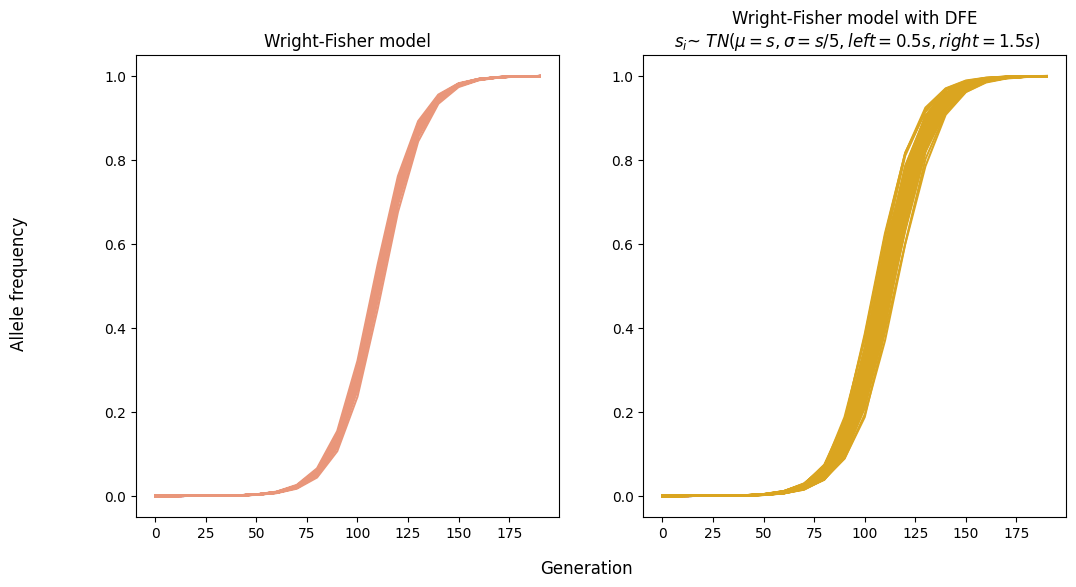

In [2]:
# WF with stochastic selection coefficient

from evo_models import WF_DFE, WF
import scipy.stats as stats
from inference_utils import get_dist

# Set the parameters
N = int(1e8)
s = 0.1
mu = 1e-6
G = 200

dist = get_dist(s)
# Plot the results  
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i in range(100):
    wf = WF(s, mu, N, G, seed=None) # Run the basic WFmodel
    dfe = WF_DFE(mu, N, G, dist, seed=None) # Run the DFE model
    ax[0].plot(10*np.arange(G//10), wf, color='darksalmon') # Plot the allele frequency
    ax[1].plot(10*np.arange(G//10), dfe, color='goldenrod') # Plot the allele frequency
fig.supxlabel("Generation")
fig.supylabel("Allele frequency")
ax[0].set_title("Wright-Fisher model")
ax[1].set_title("Wright-Fisher model with DFE\n $s_i $~ $TN(\mu=s, \sigma=s/5, left=0.5s, right=1.5s)$")

Text(0.5, 1.0, 'WF model + bottlenecks\nevery 10 generations to 0.001N')

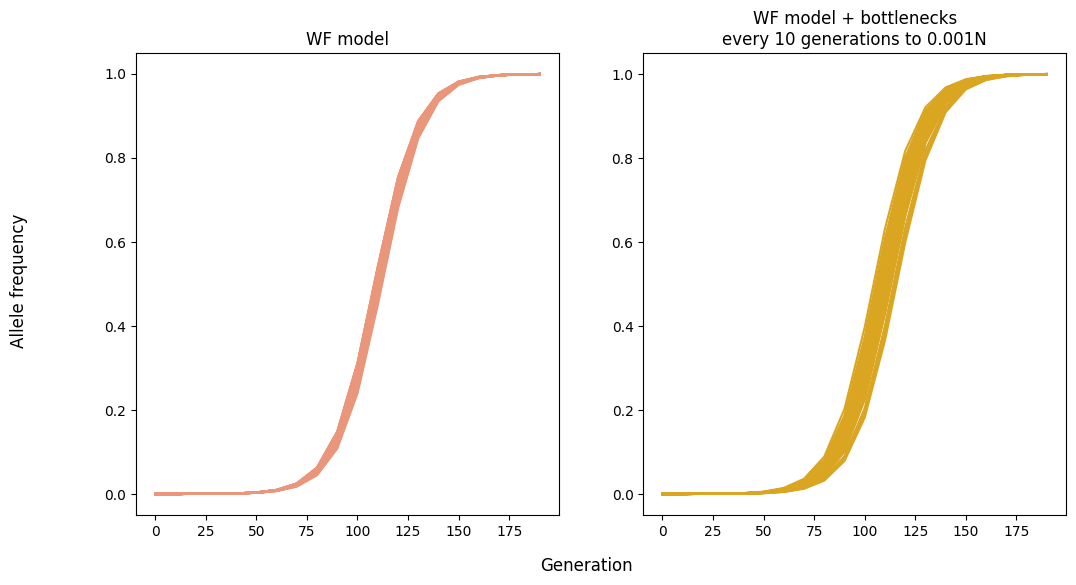

In [3]:
# WF with bottlenecks

from evo_models import WF_bottleneck

# Plot the results  
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
bottlenecks = [10*(i+1) for i in range(G//10)]
N_bottleneck = N//100
bot_dict = {b: N_bottleneck for b in bottlenecks}

for i in range(100):
    wf = WF(s, mu, N, G, seed=None) # Run the basic WFmodel
    fd = WF_bottleneck(s, mu, N, G, bot_dict, seed=None) # Run the bottleneck model
    ax[0].plot(10*np.arange(G//10), wf, color='darksalmon') # Plot the allele frequency
    ax[1].plot(10*np.arange(G//10), fd, color='goldenrod') # Plot the allele frequency
fig.supxlabel("Generation")
fig.supylabel("Allele frequency")
ax[0].set_title("WF model")
ax[1].set_title("WF model + bottlenecks\nevery 10 generations to 0.001N")

Text(0.5, 1.0, '2 mutations')

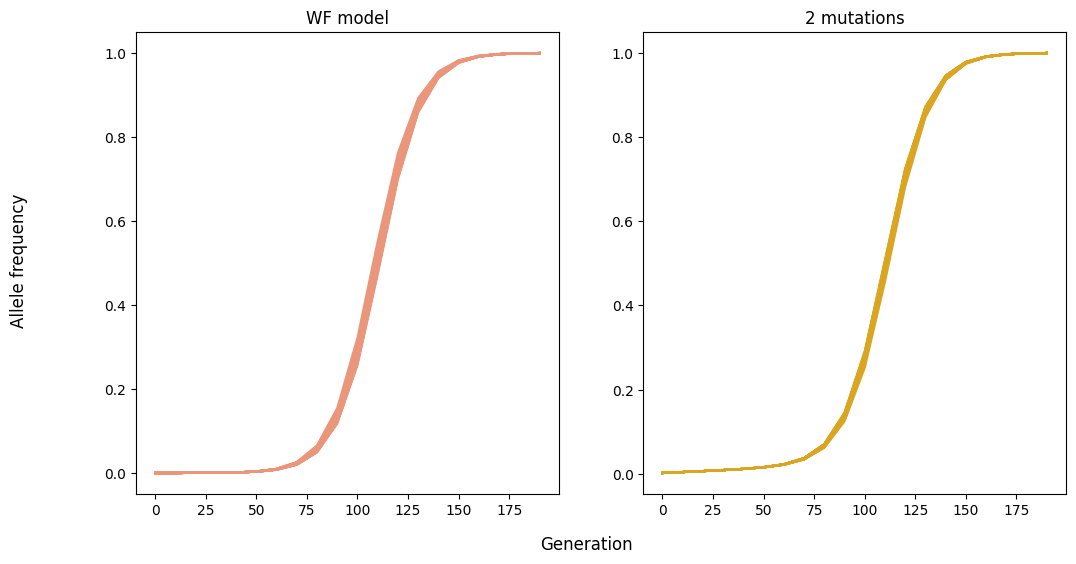

In [5]:
# WF with 2 mutations

from evo_models import combined_WF_full
# Plot the results  
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
s1, m1, s2, m2, s12, m12, m21 = 0, 220*mu, 0, 220*mu, s, 220*mu, 220*mu
for i in range(100):
    wf = WF(s, mu, N, G, seed=None) # Run the basic WFmodel
    comb = combined_WF_full(s1, m1, s2, m2, s12, m12, m21, N, G, seed=None)[:20] # Run the combined model
    ax[0].plot(10*np.arange(G//10), wf, color='darksalmon') # Plot the allele frequency
    ax[1].plot(10*np.arange(G//10), comb, color='goldenrod') # Plot the allele frequency
fig.supxlabel("Generation")
fig.supylabel("Allele frequency")
ax[0].set_title("WF model")
ax[1].set_title("2 mutations")

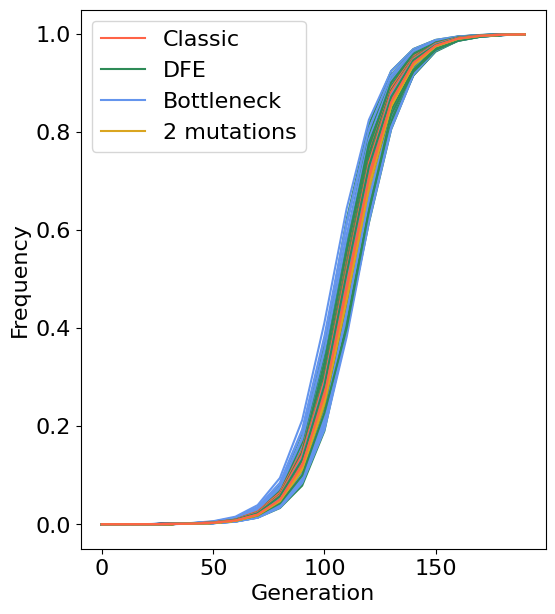

In [6]:
# all together - Figure 1C
change_font(16)
fig, ax = plt.subplots(figsize=(6, 7))

for i in range(100):
    wf = WF(s, mu, N, G, seed=None) # Run the basic WFmodel
    dfe = WF_DFE(mu, N, G, dist, seed=None) # Run the DFE model
    bot = WF_bottleneck(s, mu, N, G, bot_dict, seed=None) # Run the bottleneck model
    comb = combined_WF(s1, m1, s2, m2, s12, m12, m21, N, G, seed=None) # Run the combined model
    
    ax.plot(10*np.arange(G//10), bot, color='cornflowerblue', label='Bottleneck' if i==2 else '') # Plot the allele frequency
    ax.plot(10*np.arange(G//10), dfe, color='seagreen', label='DFE' if i==1 else '') # Plot the allele frequency
    ax.plot(10*np.arange(G//10), comb, color='goldenrod', label='2 mutations' if i==3 else '') # Plot the allele frequency
    ax.plot(10*np.arange(G//10), wf, color='tomato', label='Classic' if i==0 else '') # Plot the allele frequency

ax.set_xlabel('Generation')
ax.set_ylabel('Frequency')
ax.legend()